Name : Zullinira Dwi Utami

Email : zullinira23@gmail.com

## **Final Project**

customer segmentation using RFM Analysis K-Means Clustering

The Business Question :
1. What are top 10 selling products ?
2. How is the distribution of customers by country?
3. How many products are sold each month?
4. How is the segmentation of online retail customers? And define more royal customers !
5. Give recommendations to increase sales based on waht has been done before !

## Data Preparation

In [ ]:
#import library
import pandas as pd
import numpy as np

import datetime as dt

In [ ]:
# import visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import dataset
data = pd.read_excel('/content/drive/MyDrive/Dibimbing/Final Project/Online Retail.xlsx')

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Attribute Information

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

## Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


From the info, the table has 8 columns and 541,909 rows

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


*   Negative values in Quantity and Unit Price (min section) may represent canceled products. We will check !

Check negative values

In [ ]:
#check negative values
cancelled_orders = data[data['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom




*   Products that have been canceled should be removed from the analysis table because they do not include actual sales



The 'C' in the invoices shows the canceled transactions. Since we will not use the canceled transactions, we should remove them.

In [ ]:
#recency
data = data[~data["InvoiceNo"].str.contains("C", na = False)]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
data. shape

(532621, 8)

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,532621.000000,532621.000000,397924.000000
mean,10.239972,3.847621,15294.315171
std,159.593551,41.758023,1713.169877
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


data no longer has negative values

How many orders were cancelled?

In [ ]:
print("There were", len(cancelled_orders), "cancelled orders.")

total_orders = data['InvoiceNo'].nunique()
number_cancelled = len(cancelled_orders)
print('Percentage of orders cancelled: {:.2f}% '.format((number_cancelled / total_orders) * 100))

There were 9288 cancelled orders.
Percentage of orders cancelled: 42.10% 


check again if there are still negative values

In [ ]:
data[data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom


In [ ]:
data[data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Check Missing Value

In [ ]:
#check missing value
def summarize_dataset(df):
    summary = pd.DataFrame(df.dtypes, columns=['Data Types'])
    summary = summary.reset_index()
    summary['Missing Values'] = df.isnull().sum().values
    summary['Missing Values (percentage)'] = (df.isnull().sum().values/541909)*100
    summary['Unique Values'] = df.nunique().values
    
    return summary

In [ ]:

display(summarize_dataset(data))

,index,Data Types,Missing Values,Missing Values (percentage),Unique Values
0,InvoiceNo,object,0,0.000000,22064
1,StockCode,object,0,0.000000,4059
2,Description,object,1454,0.268311,4207
3,Quantity,int64,0,0.000000,691
4,InvoiceDate,datetime64[ns],0,0.000000,19990
5,UnitPrice,float64,0,0.000000,1293
6,CustomerID,float64,134697,24.856018,4339
7,Country,object,0,0.000000,38



*   The most missing values are in CustomerID column which reaches 24% of the data.
*   Missing value in customer ID must be dropped because it cannot be replaced with any value





In [ ]:
data.shape

(532621, 8)

In [ ]:
#drop missing value

data = data.dropna(axis = 0, how = 'any')

In [ ]:
display(summarize_dataset(data))

,index,Data Types,Missing Values,Missing Values (percentage),Unique Values
0,InvoiceNo,object,0,0.0,18536
1,StockCode,object,0,0.0,3665
2,Description,object,0,0.0,3877
3,Quantity,int64,0,0.0,302
4,InvoiceDate,datetime64[ns],0,0.0,17286
5,UnitPrice,float64,0,0.0,441
6,CustomerID,float64,0,0.0,4339
7,Country,object,0,0.0,37


In [ ]:
data. shape

(397924, 8)

In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


There are no more missing values

## Exploratory Data Analysis

1. what are the top 10 selling products?

In [ ]:
top_products 

NameError: ignored

In [ ]:
top_products = data.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head(10)
top_products

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
JUMBO BAG RED RETROSPOT,46181
WHITE HANGING HEART T-LIGHT HOLDER,36725
ASSORTED COLOUR BIRD ORNAMENT,35362
PACK OF 72 RETROSPOT CAKE CASES,33693
POPCORN HOLDER,30931
RABBIT NIGHT LIGHT,27202


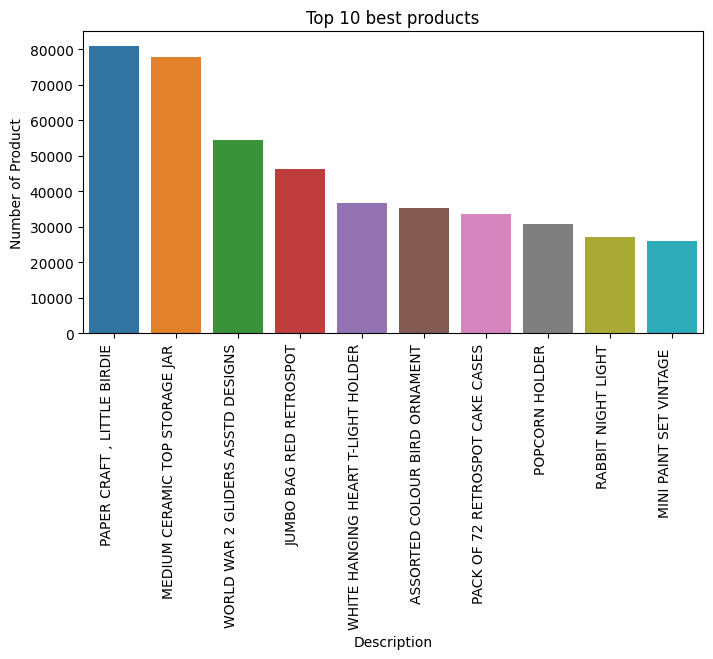

In [ ]:
product_df = pd.DataFrame(top_products.groupby('Description')['Quantity'].sum())
product_df.columns = ['Number of Product']
product_df.sort_values('Number of Product', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(8,4),dpi=100)
ax=sns.barplot(x=product_df.index, y=product_df['Number of Product'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Top 10 best products')
plt.show()

2. How is the distribution of customers by country?

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.Country.value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

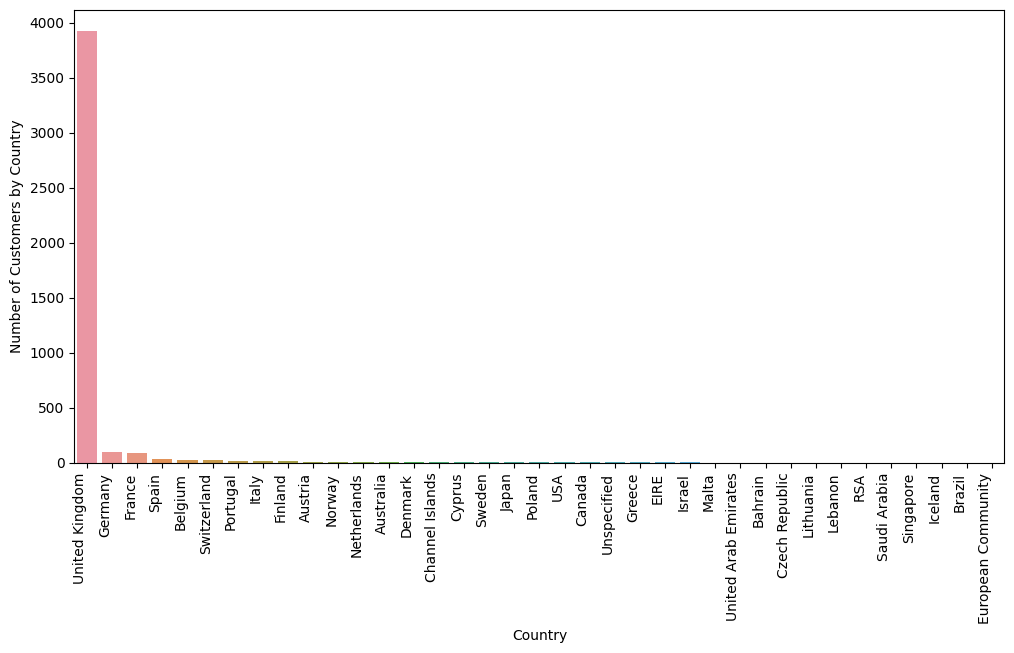

In [ ]:
country_df = pd.DataFrame(data.groupby('Country')['CustomerID'].nunique())
country_df.columns = ['Number of Customers by Country']
country_df.sort_values('Number of Customers by Country', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax=sns.barplot(x=country_df.index, y=country_df['Number of Customers by Country'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

- Based on the picture, it can be seen that most of the customers are from United Kingdom which reached 3.800 customers.
- The fewest customers are from European Community

In [ ]:
data['Total_Cost'] = data['Quantity'] * data['UnitPrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



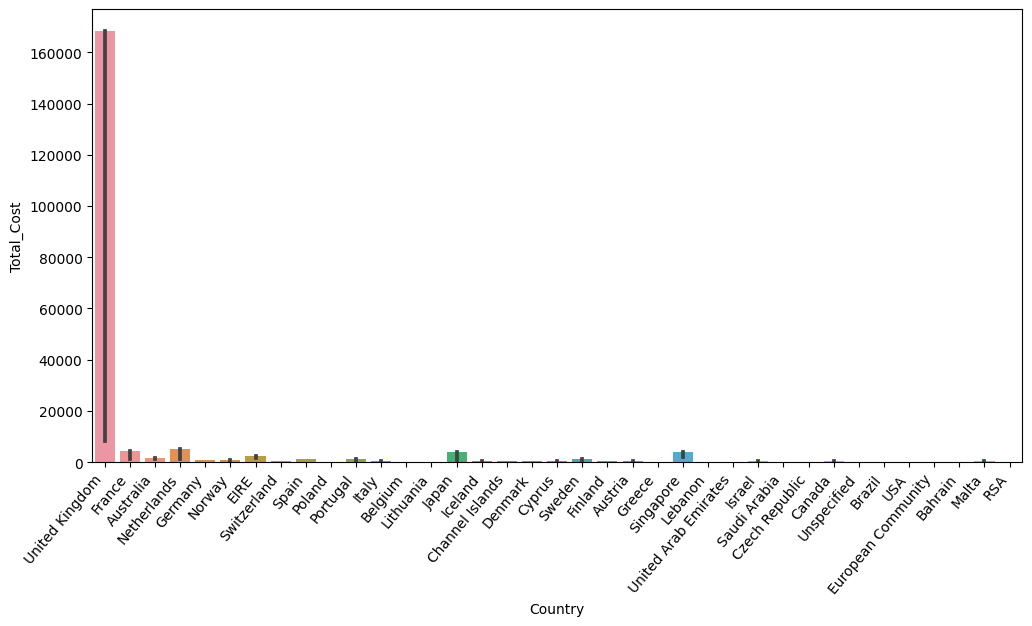

In [ ]:
fig1, ax1 = plt.subplots(figsize=(12,6),dpi=100)
ax1=sns.barplot(x='Country', y='Total_Cost', data=data, estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")
plt.show()

The UK has not only the most sales revenue, but also the most customers. Since most of this data set contains orders from the UK. France is the second country with the largest total cost. While the least total costs is RSA country

3. How many products are sold each month?

In [ ]:
#create a new table in the form of month and year of purchase

data['Date'] = data['InvoiceDate'].dt.strftime('%Y-%m')
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [ ]:
data_product= data.groupby("Date").Quantity.sum()
data_product.head()

Date
2010-12    312280
2011-01    349147
2011-02    265638
2011-03    348544
2011-04    292225
Name: Quantity, dtype: int64

In [ ]:
#converting series to dataframe and resetting index.

data_product=pd.DataFrame(data_product)
data_product=data_product.reset_index()
data_product.head()

,Date,Quantity
0,2010-12,312280
1,2011-01,349147
2,2011-02,265638
3,2011-03,348544
4,2011-04,292225


In [ ]:

def plot_df(data, x, y, title="", xlabel='Date', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(14,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Green', marker='o', alpha = 0.65)
    plt.show()

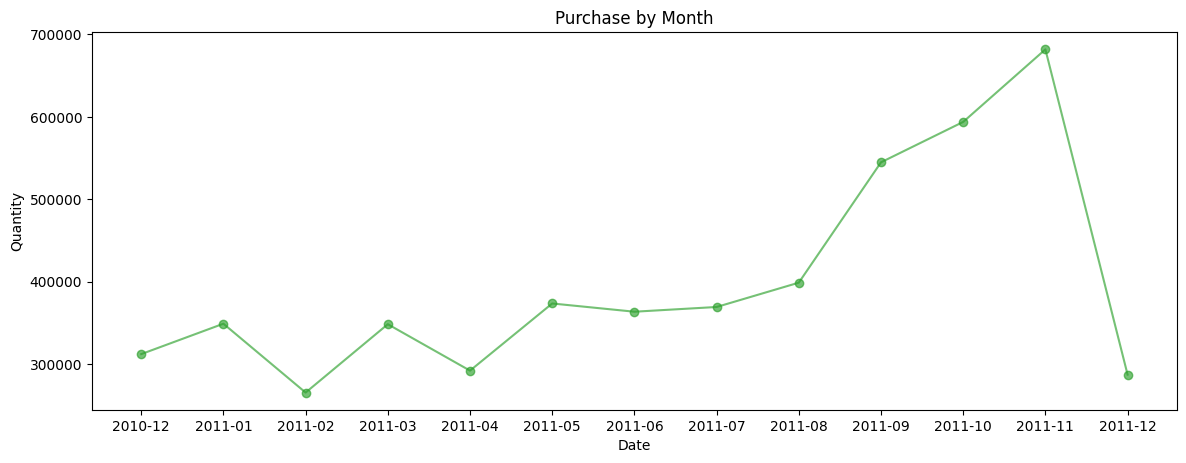

In [ ]:
plot_df(data_product, x=data_product.Date, y=data_product.Quantity,title='Purchase by Month')

## RFM Method

In [ ]:
data_final =data

In [ ]:
data_final.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [ ]:
# the last date of purchase
data_final["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
import datetime as dt
today_date = dt.datetime(2011, 12, 10)

In [ ]:
rfm = data_final.groupby('CustomerID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                     'InvoiceNo':'count',
                                     'Total_Cost': 'sum'})

In [ ]:
#change column names 
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [ ]:
#the number of Monetary and the Frequency cannot be less than 0
rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)]

In [ ]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


## K-Means Clustering

Standarisasi 

In [ ]:
rfm_segmentation = rfm.copy()

In [ ]:
# feature columns
columns_name = ['Recency','Frequency','Monetary']

# standardized df for training
standardized_data = rfm_segmentation

# standardization
scaler = StandardScaler()
scaler.fit(rfm_segmentation[columns_name])
standardized_features = scaler.transform(rfm_segmentation[columns_name])
standardized_data[columns_name] = standardized_features

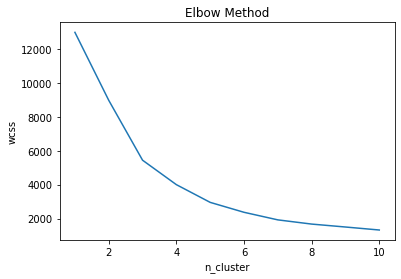

In [ ]:
#Elbow Graph

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(standardized_data[columns_name])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('wcss')

plt.show()

in this case we take k=3

In [ ]:
kmeans1 = KMeans(n_clusters = 3, init='k-means++', random_state=42).fit(standardized_data[columns_name])
labels1 = kmeans1.labels_
labels1

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
rfm['label_kmeans']=labels1
rfm.head()

,Recency,Frequency,Monetary,label_kmeans
CustomerID,,,,
12346.0,325,1,77183.60,0
12347.0,2,182,4310.00,1
12348.0,75,31,1797.24,1
12349.0,18,73,1757.55,1
12350.0,310,17,334.40,0


In [ ]:
rfm.head()

,Recency,Frequency,Monetary,label_kmeans
CustomerID,,,,
12346.0,325,1,77183.60,0
12347.0,2,182,4310.00,1
12348.0,75,31,1797.24,1
12349.0,18,73,1757.55,1
12350.0,310,17,334.40,0


In [ ]:
rfm['category customer']=np.where(rfm['label_kmeans'] == 2,'Loyal Customer',(np.where(rfm['label_kmeans']== 1 ,'Good Customer','Churn Customer')))

In [ ]:
rfm

,Recency,Frequency,Monetary,label_kmeans,category customer
CustomerID,,,,,
12346.0,325,1,77183.60,0,Churn Customer
12347.0,2,182,4310.00,1,Good Customer
12348.0,75,31,1797.24,1,Good Customer
12349.0,18,73,1757.55,1,Good Customer
12350.0,310,17,334.40,0,Churn Customer
...,...,...,...,...,...
18280.0,277,10,180.60,0,Churn Customer
18281.0,180,7,80.82,0,Churn Customer
18282.0,7,12,178.05,1,Good Customer


In [ ]:
rfm['category customer'].value_counts()

Good Customer     3245
Churn Customer    1080
Loyal Customer      13
Name: category customer, dtype: int64

In [ ]:
rfm.groupby('category customer').mean()

,Recency,Frequency,Monetary,label_kmeans
category customer,,,,
Churn Customer,246.813889,27.750926,636.501112,0
Good Customer,40.906934,103.110632,2029.105908,1
Loyal Customer,4.000000,2566.000000,126118.310000,2


2D Clustering

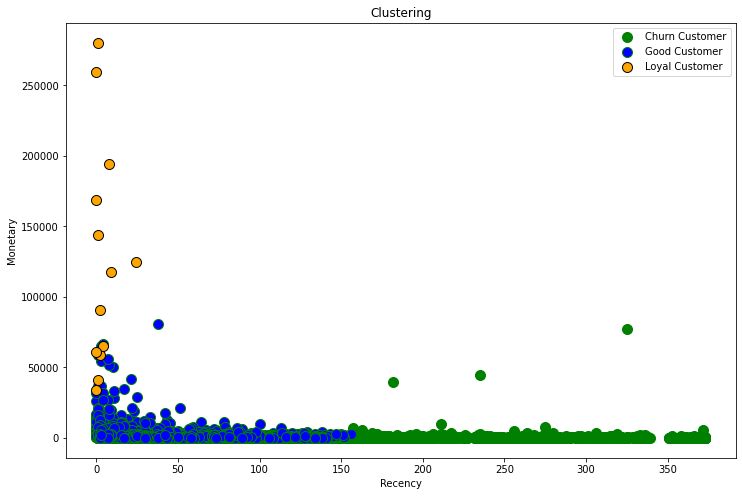

In [ ]:
#visualisasi 2d Recency vs Monetary
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.scatter(rfm['Recency'][rfm.label_kmeans == 0], 
           rfm['Monetary'][rfm.label_kmeans == 0],
           c='green', s=100, edgecolor='green',label='Churn Customer')
plt.scatter(rfm['Recency'][rfm.label_kmeans == 1], 
           rfm['Monetary'][rfm.label_kmeans == 1],
           c='blue', s=100, edgecolor='green', label='Good Customer')
plt.scatter(rfm['Recency'][rfm.label_kmeans == 2], 
           rfm['Monetary'][rfm.label_kmeans == 2],
           c='orange', s=100, edgecolor='k', label='Loyal Customer')


plt.title('Clustering')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend()

plt.show()
           

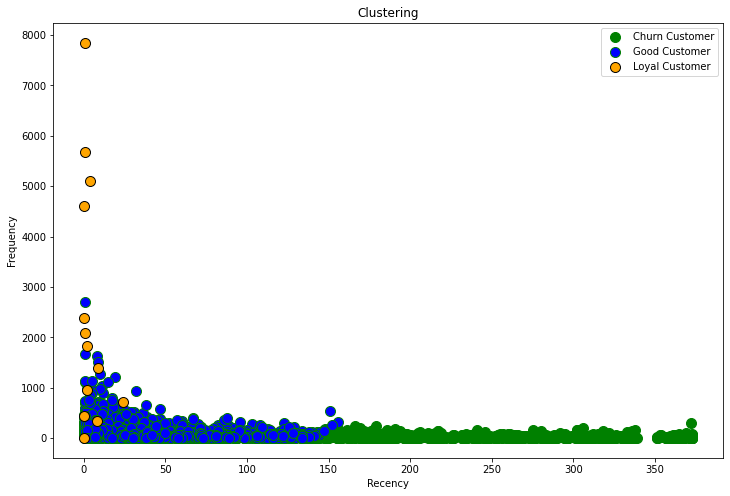

In [ ]:
#visualisasi 2d Recency Vs Frequency
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.scatter(rfm['Recency'][rfm.label_kmeans == 0], 
           rfm['Frequency'][rfm.label_kmeans == 0],
           c='green', s=100, edgecolor='green',label='Churn Customer')
plt.scatter(rfm['Recency'][rfm.label_kmeans == 1], 
           rfm['Frequency'][rfm.label_kmeans == 1],
           c='blue', s=100, edgecolor='green', label='Good Customer')
plt.scatter(rfm['Recency'][rfm.label_kmeans == 2], 
           rfm['Frequency'][rfm.label_kmeans == 2],
           c='orange', s=100, edgecolor='k', label='Loyal Customer')


plt.title('Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()

plt.show()
           

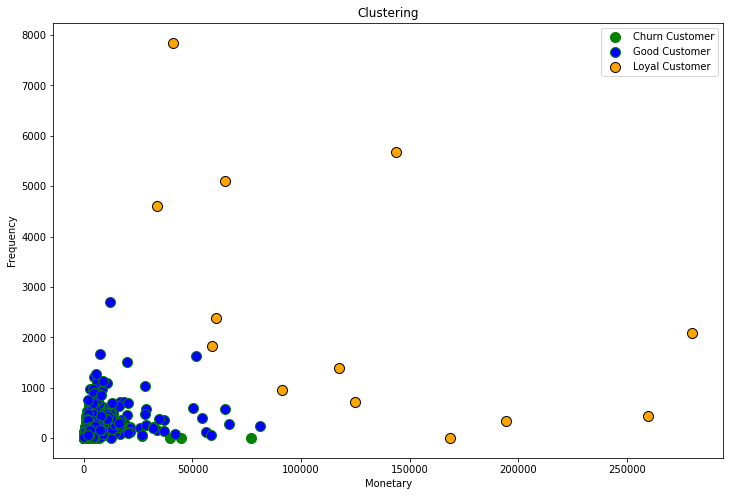

In [ ]:
#visualisasi 2d Monetary Vs Frequency
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.scatter(rfm['Monetary'][rfm.label_kmeans == 0], 
           rfm['Frequency'][rfm.label_kmeans == 0],
           c='green', s=100, edgecolor='green',label='Churn Customer')
plt.scatter(rfm['Monetary'][rfm.label_kmeans == 1], 
           rfm['Frequency'][rfm.label_kmeans == 1],
           c='blue', s=100, edgecolor='green', label='Good Customer')
plt.scatter(rfm['Monetary'][rfm.label_kmeans == 2], 
           rfm['Frequency'][rfm.label_kmeans == 2],
           c='orange', s=100, edgecolor='k', label='Loyal Customer')


plt.title('Clustering')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.legend()

plt.show()
           

Visualisasi 3d

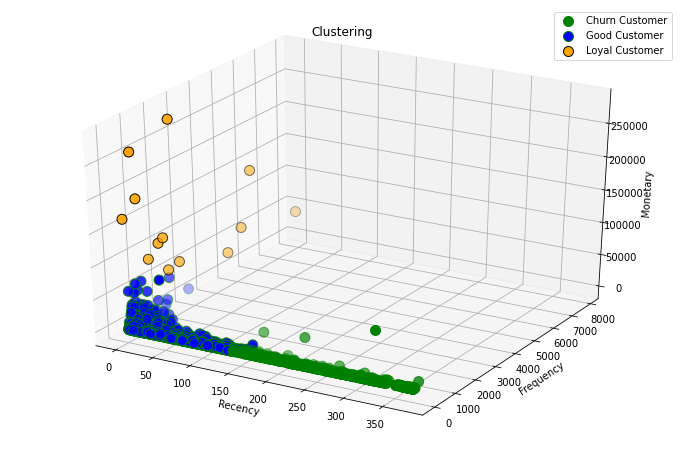

In [ ]:
#visualisasi 3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm['Recency'][rfm.label_kmeans == 0], 
           rfm['Frequency'][rfm.label_kmeans == 0],
           rfm['Monetary'][rfm.label_kmeans == 0],
           c='green', s=100, edgecolor='green',label='Churn Customer')
ax.scatter(rfm['Recency'][rfm.label_kmeans == 1], 
           rfm['Frequency'][rfm.label_kmeans == 1],
           rfm['Monetary'][rfm.label_kmeans == 1],
           c='blue', s=100, edgecolor='green', label='Good Customer')
ax.scatter(rfm['Recency'][rfm.label_kmeans == 2], 
           rfm['Frequency'][rfm.label_kmeans == 2],
           rfm['Monetary'][rfm.label_kmeans == 2],
           c='orange', s=100, edgecolor='k', label='Loyal Customer')


plt.title('Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()

plt.show()
           

In [ ]:
rfm['label_kmeans'].value_counts()

1    3245
0    1080
2      13
Name: label_kmeans, dtype: int64

In [ ]:
data_loyal=rfm.loc[(rfm['label_kmeans'] == 2)]
data_loyal=data_loyal.sort_values(by=['Recency','Frequency','Monetary'], ascending=True)
data_loyal

,Recency,Frequency,Monetary,label_kmeans,category customer
CustomerID,,,,,
16446.0,0,3,168472.50,2,Loyal Customer
18102.0,0,431,259657.30,2,Loyal Customer
15311.0,0,2379,60767.90,2,Loyal Customer
12748.0,0,4596,33719.73,2,Loyal Customer
14646.0,1,2080,280206.02,2,Loyal Customer
14911.0,1,5677,143825.06,2,Loyal Customer
17841.0,1,7847,40991.57,2,Loyal Customer
17511.0,2,963,91062.38,2,Loyal Customer
13089.0,2,1818,58825.83,2,Loyal Customer


In [ ]:
loyal_negara = pd.merge(data_loyal,data[['CustomerID','Country']],on='CustomerID', how='left')

In [ ]:
loyal_negara.head()

,CustomerID,Recency,Frequency,Monetary,label_kmeans,category customer,Country
0,16446.0,0,3,168472.5,2,Loyal Customer,United Kingdom
1,16446.0,0,3,168472.5,2,Loyal Customer,United Kingdom
2,16446.0,0,3,168472.5,2,Loyal Customer,United Kingdom
3,18102.0,0,431,259657.3,2,Loyal Customer,United Kingdom
4,18102.0,0,431,259657.3,2,Loyal Customer,United Kingdom


In [ ]:
loyal_negara['Country'].value_counts()

United Kingdom    23485
EIRE               7077
Netherlands        2080
Australia           716
Name: Country, dtype: int64

In [ ]:
data['Country'].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

In [ ]:
persentase =(((loyal_negara['Country'].value_counts()/data['Country'].value_counts())*100))
presentase1 = persentase.dropna()

In [ ]:
presentase1.sort_values

<bound method Series.sort_values of Australia         60.421941
EIRE              97.775629
Netherlands       88.023699
United Kingdom     6.627722
Name: Country, dtype: float64>

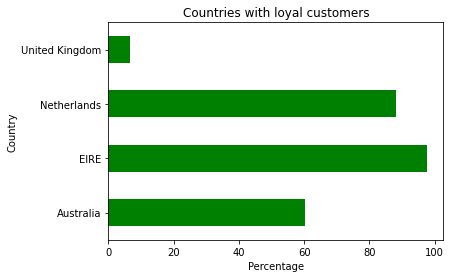

In [ ]:
presentase1.plot.barh(color='green')
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.title('Countries with loyal customers')

plt.show()

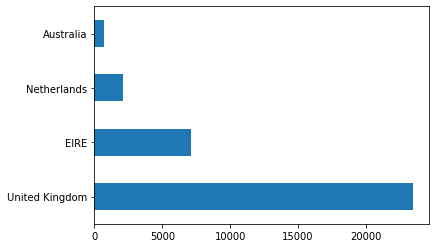

In [ ]:
presentase2 = pd.value_counts(loyal_negara['Country'].values, sort=True)
presentase2.plot.barh()

In [ ]:
loyal_negara_ID = loyal_negara.groupby('CustomerID')

In [ ]:
loyal_negara_ID

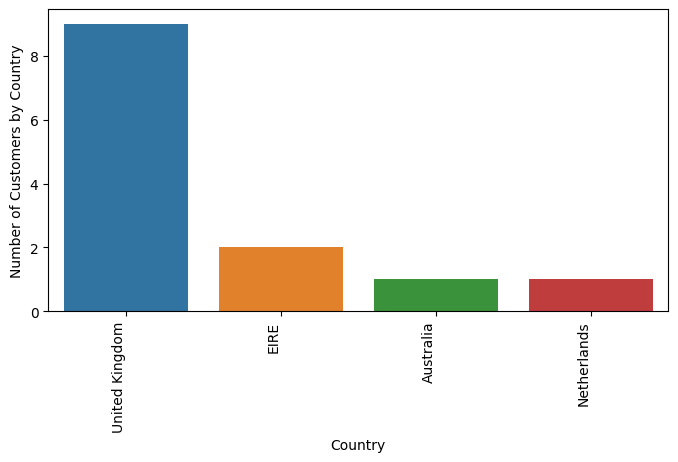

In [ ]:
country_df = pd.DataFrame(loyal_negara.groupby('Country')['CustomerID'].nunique())
country_df.columns = ['Number of Customers by Country']
country_df.sort_values('Number of Customers by Country', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(8,4),dpi=100)
ax=sns.barplot(x=country_df.index, y=country_df['Number of Customers by Country'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

Based on the 3 pictures above, it can be concluded that:
1. Countries with loyal customers are: UK, EIRE, Australia and Netherlands.
2. EIRE countries, Australia and the Netherlands have a very high percentage of loyal customers, this shows that although there are few customers from these countries, almost all of them are loyal customers.

Therefore, the marketing team can carry out special promotions in countries that have loyal customers

Top Product in Loyal Customers

In [ ]:
loyal_produk= pd.merge(data_loyal,data[['CustomerID','Country','Description','Quantity']],on='CustomerID', how='left')

In [ ]:
loyal_produk

,CustomerID,Recency,Frequency,Monetary,label_kmeans,category customer,Country,Description,Quantity
0,16446.0,0,3,168472.50,2,Loyal Customer,United Kingdom,PANTRY SCRUBBING BRUSH,1
1,16446.0,0,3,168472.50,2,Loyal Customer,United Kingdom,PANTRY PASTRY BRUSH,1
2,16446.0,0,3,168472.50,2,Loyal Customer,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",80995
3,18102.0,0,431,259657.30,2,Loyal Customer,United Kingdom,WOOD BLACK BOARD ANT WHITE FINISH,408
4,18102.0,0,431,259657.30,2,Loyal Customer,United Kingdom,UTILTY CABINET WITH HOOKS,30
...,...,...,...,...,...,...,...,...,...
33353,12415.0,24,716,124914.53,2,Loyal Customer,Australia,SMALL HEART MEASURING SPOONS,160
33354,12415.0,24,716,124914.53,2,Loyal Customer,Australia,LARGE HEART MEASURING SPOONS,80
33355,12415.0,24,716,124914.53,2,Loyal Customer,Australia,DOORMAT HEARTS,10
33356,12415.0,24,716,124914.53,2,Loyal Customer,Australia,72 SWEETHEART FAIRY CAKE CASES,120


In [ ]:
top_products_loyal =loyal_produk.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head(10)
top_products_loyal

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
PACK OF 72 RETROSPOT CAKE CASES,6828
RABBIT NIGHT LIGHT,6805
WHITE HANGING HEART T-LIGHT HOLDER,6513
SPACEBOY LUNCH BOX,6218
HEART OF WICKER SMALL,6210
CREAM HEART CARD HOLDER,6008
DOLLY GIRL LUNCH BOX,5915
JUMBO BAG RED RETROSPOT,5479


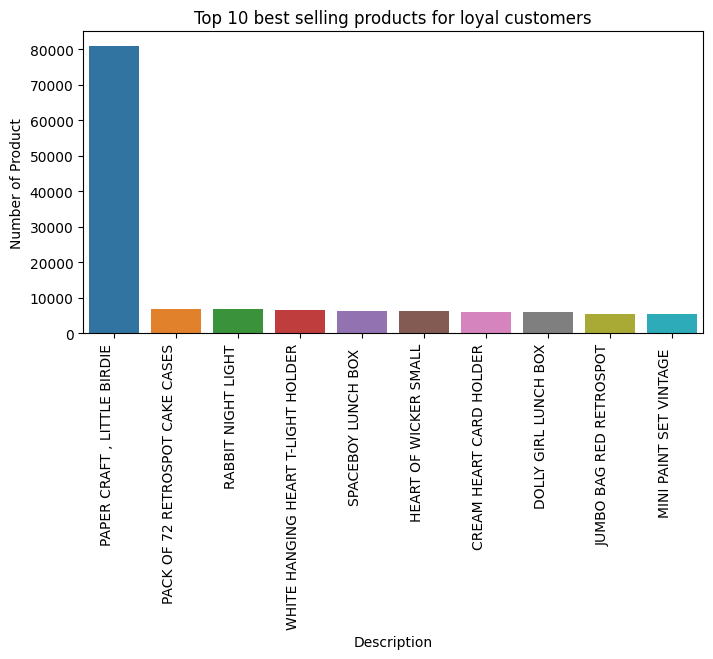

In [ ]:
product_df = pd.DataFrame(top_products_loyal.groupby('Description')['Quantity'].sum())
product_df.columns = ['Number of Product']
product_df.sort_values('Number of Product', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(8,4),dpi=100)
ax=sns.barplot(x=product_df.index, y=product_df['Number of Product'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Top 10 best selling products for loyal customers')
plt.show()

Based on the picture, it can be seen that these are 10 products purchased by loyal customers. The marketing team can carry out certain promotions on these 10 products to be able to continue to maintain and increase loyal customer purchases.

In [ ]:
data[data['Description']== 'PAPER CRAFT , LITTLE BIRDIE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost,Date
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,2011-12
